# Using FIt-SNE

Author: Dmitry Kobak & Lan Huong Nguyen

In [1]:
import os, sys, mkl, time, pickle
#limit the number of threds numpy/scipy are using
nthreads = 15
os.environ["OMP_NUM_THREADS"] = str(nthreads)
mkl.set_num_threads(nthreads)
import numpy as np
import multiprocessing as mp

# plotting
import matplotlib.pyplot as plt
import matplotlib as mpl


mpl.rcParams['figure.titlesize'] = 24
mpl.rcParams['axes.titlesize']   = 20
mpl.rcParams['axes.labelsize']   = 20
mpl.rcParams['xtick.labelsize']  = 20
mpl.rcParams['ytick.labelsize']  = 20


# Custom pyscripts
maindir = '/home/lanhuong/Projects/ManifoldLearning/DiffusionTSNE'
os.chdir(maindir)
sys.path.insert(0, maindir)
from diffusion_tsne import diffusion_tsne

from plotting import *
from generate_data import *
from utils import *
from metrics import *

%load_ext autoreload
%autoreload 2

# 10 nice colors
col = np.array(['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99',
                '#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a'])
MACHINE_EPSILON = np.finfo(np.double).eps

# MNIST

In [2]:
# Load MNIST data
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float64') / 255
x_test  =  x_test.reshape(10000, 784).astype('float64') / 255
X = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))
print(X.shape)

# Do PCA and keep 50 dimensions
X = X - X.mean(axis=0)
U, s, V = np.linalg.svd(X, full_matrices=False)
X50 = np.dot(U, np.diag(s))[:,:50]

# We will use PCA initialization later on
PCAinit = X50[:,:2] / np.std(X50[:,0]) * 0.0001

Using Theano backend.


(70000, 784)


In [21]:
# Running t-SNE on the full MNIST
start = time.time()
Z50_0 = diffusion_tsne(X50, perplexity=100, seed=42, scale_probs = False,
                       nthreads=nthreads, load_affinities="save")
end = time.time()
print('t-SNE embedding in %f sec' %(end-start))

Using compiled binary file: /bin/diffusion_tsne
t-SNE embedding in 148.801894 sec


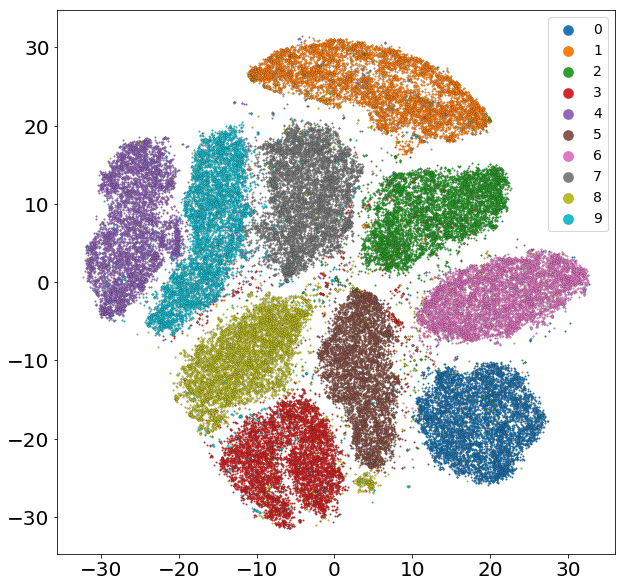

In [19]:
plot2D(Z50_0, label=y, s=3, figsize=(10,10))
plt.legend(fontsize=14, markerscale=6)

(-35.59171162511351, 35.98439341082573, -34.58998155355739, 34.639684746017046)

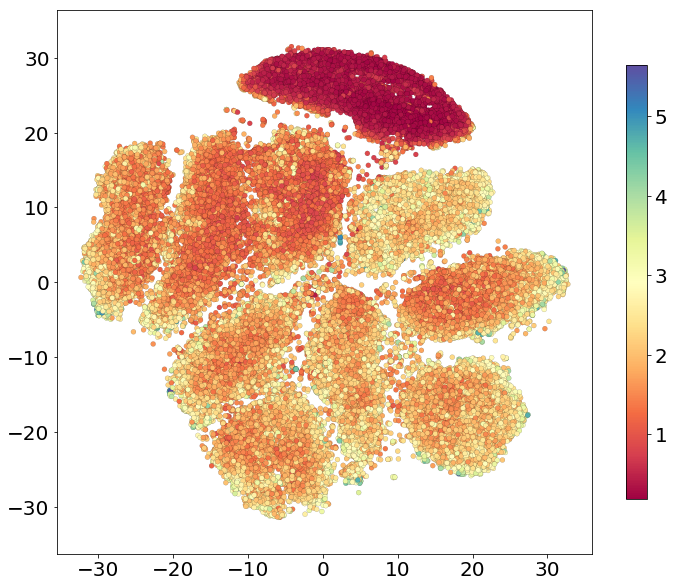

In [20]:
betas0= np.fromfile('betas.dat', dtype=np.dtype('d'))
degrees0 = np.fromfile('affinity_rowsums.dat', dtype=np.dtype('d'))
meandist0 = np.fromfile('mean_dists.dat', dtype=np.dtype('d'))
plot2D(Z50_0, label= 1/(2*betas0), s=25, figsize=(12,10))
plt.axis('equal')

In [3]:
# Running t-SNE on the full MNIST
start = time.time()
Z50 = diffusion_tsne(X50, perplexity=100, seed=42, scale_probs = False,
                     late_exag_coeff=2, start_late_exag_iter=800,
                     nthreads=nthreads, load_affinities="save")
end = time.time()
print('t-SNE embedding in %f sec' %(end-start))

Using compiled binary file: /bin/diffusion_tsne
t-SNE embedding in 141.374128 sec


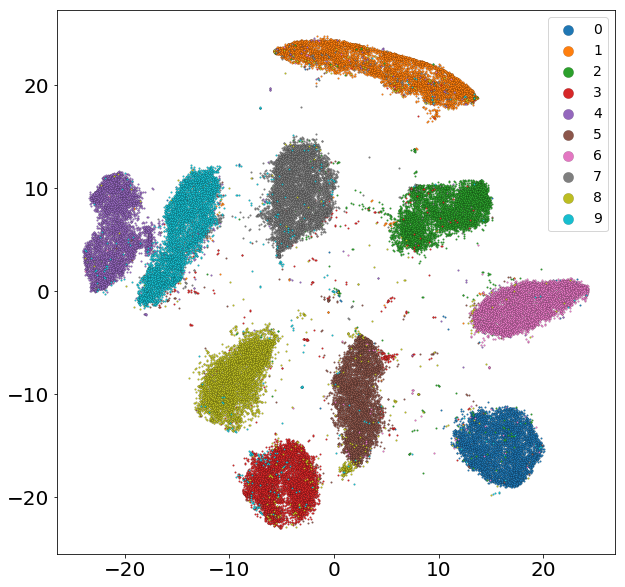

In [5]:
plot2D(Z50, label=y, s=3, figsize=(10,10))
plt.legend(fontsize=14, markerscale=6)

(-26.431870155005445, 26.73870369458244, -25.46526188780675, 27.1337623739394)

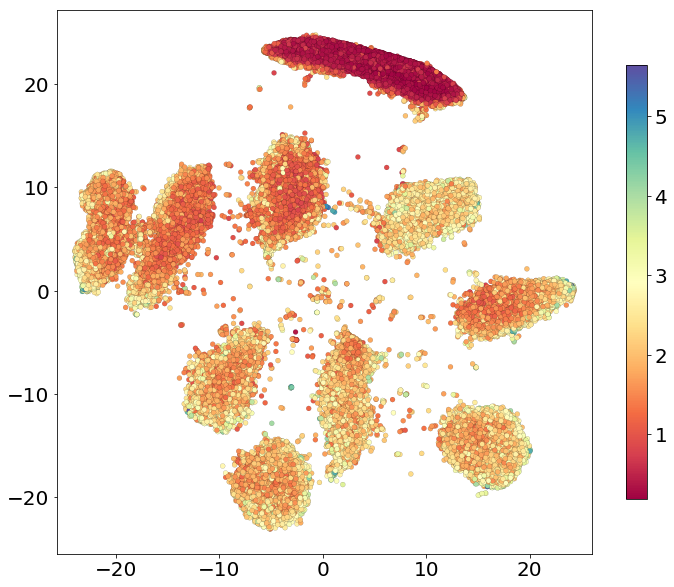

In [6]:
betas = np.fromfile('betas.dat', dtype=np.dtype('d'))
degrees = np.fromfile('affinity_rowsums.dat', dtype=np.dtype('d'))
meandist = np.fromfile('mean_dists.dat', dtype=np.dtype('d'))
plot2D(Z50, label= 1/(2*betas), s=25, figsize=(12,10))
plt.axis('equal')

In [38]:
start = time.time()
Z50scale_0 = diffusion_tsne(X50, perplexity=100, seed=123, scale_probs = True,
                          nthreads=nthreads, load_affinities="save")
end = time.time()
print('Scaled t-SNE embedding in %f sec' %(end-start))

Using compiled binary file: /bin/diffusion_tsne
Scaled t-SNE embedding in 144.833066 sec


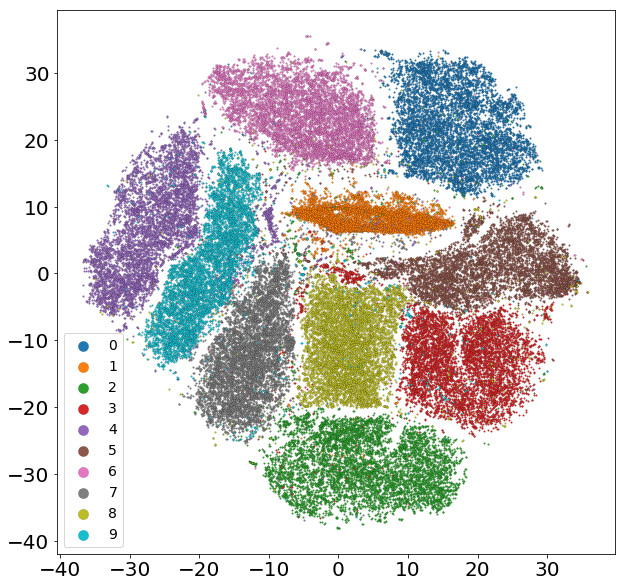

In [39]:
plot2D(Z50scale_0, label=y, s=3, figsize=(10,10))
plt.legend(fontsize=14, markerscale=6)

(-40.37207177304647, 39.54211382680828, -41.74176637182033, 39.19075729999344)

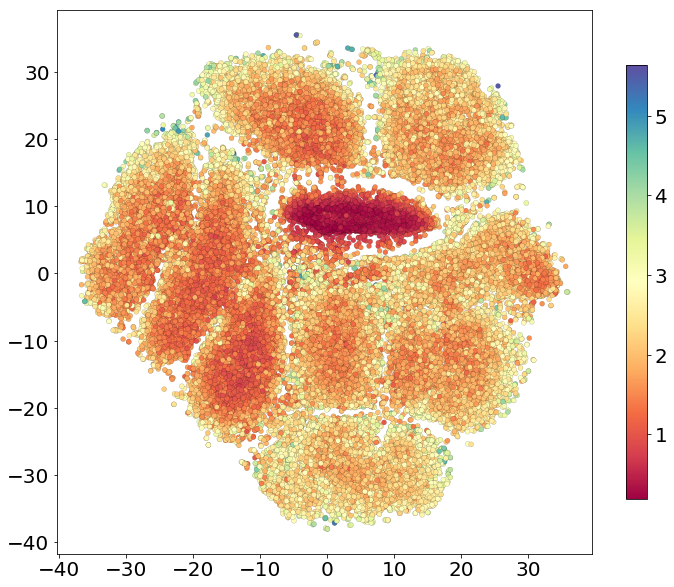

In [40]:
betas2_0 = np.fromfile('betas.dat', dtype=np.dtype('d'))
degrees2_0 = np.fromfile('affinity_rowsums.dat', dtype=np.dtype('d'))
meandist2_0 = np.fromfile('mean_dists.dat', dtype=np.dtype('d'))
plot2D(Z50scale_0, label= 1/(2*betas2_0), s=25, figsize=(12, 10))
plt.axis('equal')

In [29]:
start = time.time()
Z50scale = diffusion_tsne(X50, perplexity=100, seed=42, scale_probs = True,
                          stop_early_exag_iter=300,
                          late_exag_coeff=2, start_late_exag_iter=800, 
                          nthreads=nthreads, load_affinities="save")
end = time.time()
print('t-SNE embedding in %f sec' %(end-start))

Using compiled binary file: /bin/diffusion_tsne
t-SNE embedding in 140.142776 sec


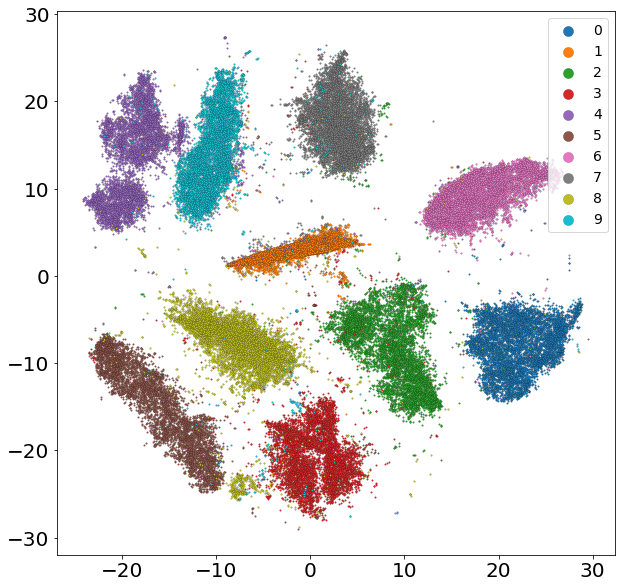

In [30]:
plot2D(Z50scale, label=y, s=3, figsize=(10,10))
plt.legend(fontsize=14, markerscale=6)

(-26.851416574365885,
 32.22419728090274,
 -31.875334560637086,
 30.227346248585086)

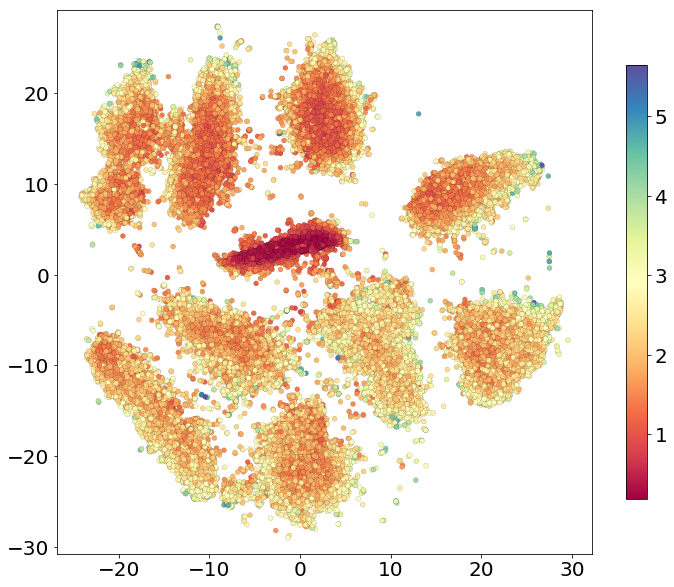

In [31]:
betas2 = np.fromfile('betas.dat', dtype=np.dtype('d'))
degrees2 = np.fromfile('affinity_rowsums.dat', dtype=np.dtype('d'))
meandist2 = np.fromfile('mean_dists.dat', dtype=np.dtype('d'))
plot2D(Z50scale, label= 1/(2*betas2), s=25, figsize=(12, 10))
plt.axis('equal')

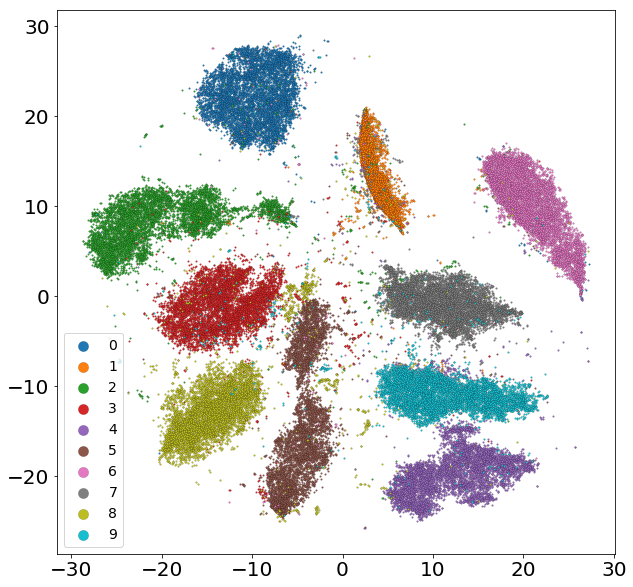

In [16]:
plot2D(Z50scale, label=y, s=3, figsize=(10,10))
plt.legend(fontsize=14, markerscale=6)

(-31.531406847407172,
 30.03906877899607,
 -28.560084362092805,
 31.770458470397365)

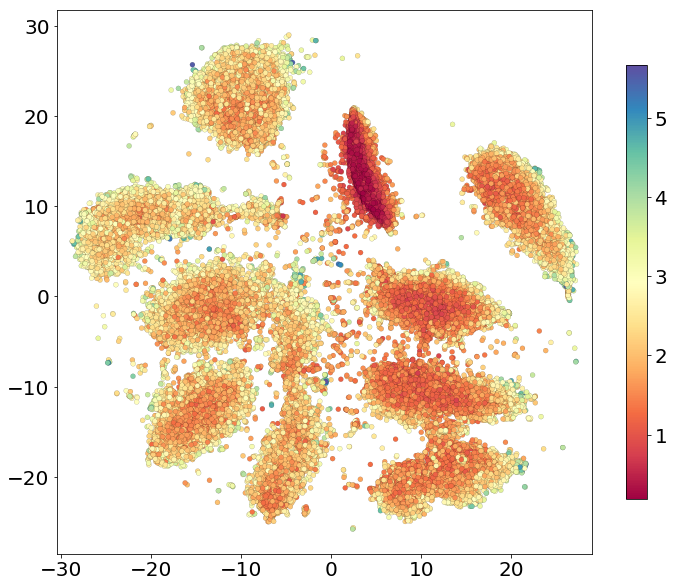

In [17]:
betas2 = np.fromfile('betas.dat', dtype=np.dtype('d'))
degrees2 = np.fromfile('affinity_rowsums.dat', dtype=np.dtype('d'))
meandist2 = np.fromfile('mean_dists.dat', dtype=np.dtype('d'))
plot2D(Z50scale, label= 1/(2*betas2), s=25, figsize=(12, 10))
plt.axis('equal')